<a href="https://colab.research.google.com/github/snehashis25/Cats_and_dogs_image_classifier/blob/main/Cats_and_Dogs_Image_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.05G/1.06G [00:07<00:00, 177MB/s]
100% 1.06G/1.06G [00:07<00:00, 149MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization, MaxPooling2D,Dropout

In [5]:

train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:

def process (image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)



In [7]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding = 'valid',activation='relu',input_shape = (256,256,3)))
model.add(MaxPooling2D(pool_size = (2,2),strides = 2, padding = 'valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding = 'valid',activation='relu',input_shape = (256,256,3)))
model.add(MaxPooling2D(pool_size = (2,2),strides = 2, padding = 'valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding = 'valid',activation='relu',input_shape = (256,256,3)))
model.add(MaxPooling2D(pool_size = (2,2),strides = 2, padding = 'valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [9]:
model.compile(optimizer = 'adam',loss='binary_crossentropy',metrics = ['accuracy'])


In [10]:

history = model.fit(train_ds,epochs = 10, validation_data = validation_ds)

Epoch 1/10
625/625 [==============================] - 80s 115ms/step - loss: 0.5997 - accuracy: 0.6710 - val_loss: 0.5322 - val_accuracy: 0.7354
Epoch 2/10
625/625 [==============================] - 60s 96ms/step - loss: 0.4621 - accuracy: 0.7786 - val_loss: 0.4969 - val_accuracy: 0.7650
Epoch 3/10
625/625 [==============================] - 52s 82ms/step - loss: 0.3540 - accuracy: 0.8408 - val_loss: 0.4558 - val_accuracy: 0.8002
Epoch 4/10
625/625 [==============================] - 55s 87ms/step - loss: 0.2172 - accuracy: 0.9077 - val_loss: 0.6439 - val_accuracy: 0.7896
Epoch 5/10
625/625 [==============================] - 54s 85ms/step - loss: 0.1151 - accuracy: 0.9569 - val_loss: 0.9119 - val_accuracy: 0.7888
Epoch 6/10
625/625 [==============================] - 55s 86ms/step - loss: 0.0785 - accuracy: 0.9719 - val_loss: 1.0526 - val_accuracy: 0.7872
Epoch 7/10
625/625 [==============================] - 51s 80ms/step - loss: 0.0526 - accuracy: 0.9819 - val_loss: 1.1912 - val_accuracy

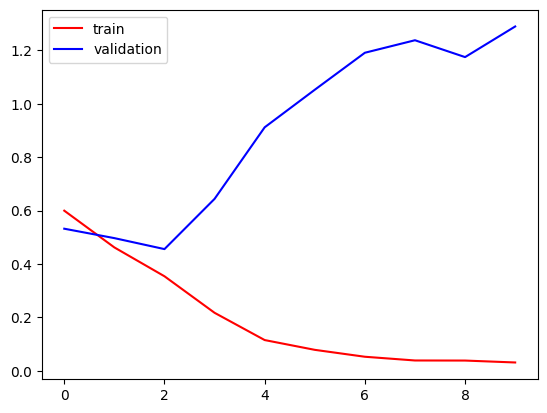

In [11]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], color='red',label='train')
plt.plot(history.history['val_loss'], color='blue',label='validation')
plt.legend()
plt.show()


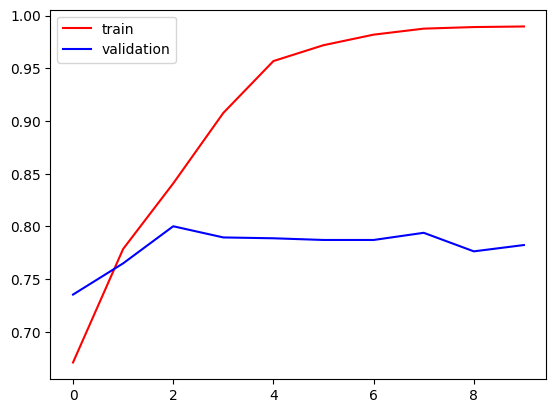

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color='red',label='train')
plt.plot(history.history['val_accuracy'], color='blue',label='validation')
plt.legend()
plt.show()



In [13]:

import cv2

In [18]:
test_image = cv2.imread('/content/cat.jpg')


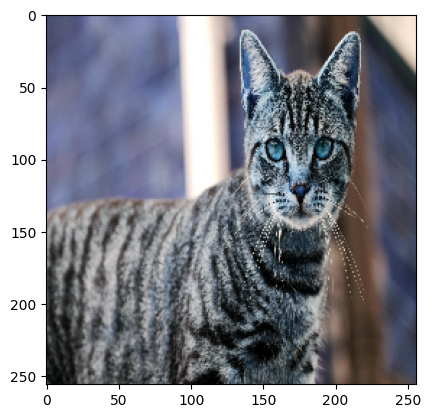

In [21]:

plt.imshow(test_image)

In [22]:
test_image.shape
test_image = cv2.resize(test_image,(256,256))
test_input = test_image.reshape(1,256,256,3)
pred = model.predict(test_input)


1/1 [==============================] - 0s 18ms/step


In [23]:
if pred == 0 :
  print("it's a Cat")
else:
  print("it's a Dog")

it's a Cat
